# Sandbox

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

import synthesizAR

%matplotlib inline

In [2]:
noaa1158 = synthesizAR.Field.restore('/storage-home/w/wtb2/data/timelag_synthesis_v2/base_noaa1158/')

In [3]:
dipole = synthesizAR.Field.restore('/storage-home/w/wtb2/data/timelag_synthesis_v2/simple_dipole/base_field/')

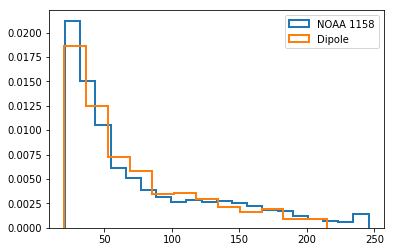

In [8]:
opts = {'bins':'scott','histtype':'step','lw':2,'density':True}
plt.hist([l.full_length.to(u.Mm).value for l in noaa1158.loops],**opts,label='NOAA 1158');
plt.hist([l.full_length.to(u.Mm).value for l in dipole.loops],**opts,label='Dipole');
plt.legend()

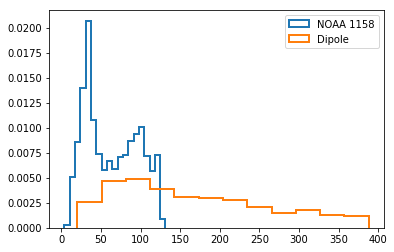

In [9]:
opts = {'bins':'scott','histtype':'step','lw':2,'density':True}
plt.hist([l.field_strength.to(u.G).mean().value for l in noaa1158.loops],**opts,label='NOAA 1158');
plt.hist([l.field_strength.to(u.G).mean().value for l in dipole.loops],**opts,label='Dipole');
plt.legend()

/storage-home/w/wtb2/anaconda3/envs/synthesized-timelags/lib/python3.6/site-packages/sunpy-1.0.dev9846-py3.6-linux-x86_64.egg/sunpy/map/mapbase.py:645: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,


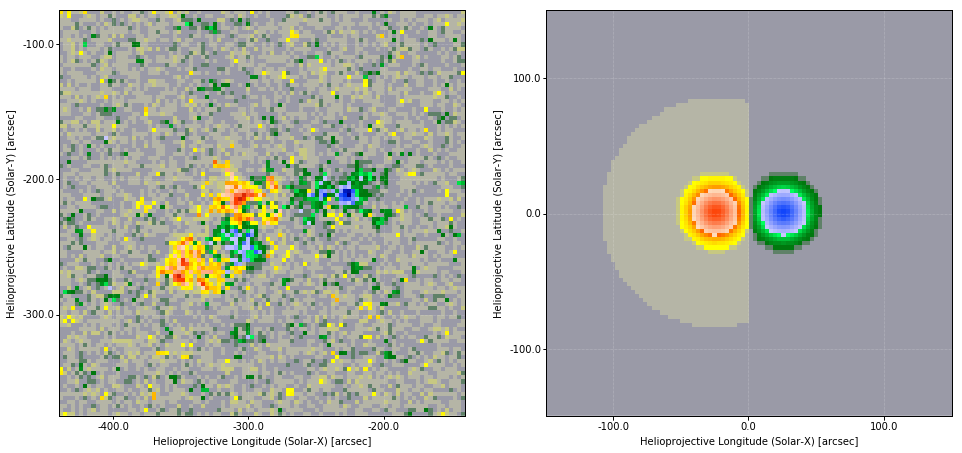

In [10]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121,projection=noaa1158.magnetogram)
noaa1158.magnetogram.plot(axes=ax,title=False,vmin=-1.5e3,vmax=1.5e3,cmap='hmimag')
ax = fig.add_subplot(122,projection=dipole.magnetogram)
dipole.magnetogram.plot(axes=ax,title=False,vmin=-1.5e3,vmax=1.5e3,cmap='hmimag')

In [27]:
dipole_low = synthesizAR.Field.restore('/storage-home/w/wtb2/data/timelag_synthesis_v2/simple_dipole/intermediate_frequency/field_checkpoint/')

In [28]:
noaa1158_low = synthesizAR.Field.restore('/storage-home/w/wtb2/data/timelag_synthesis_v2/intermediate_frequency/field_checkpoint/')

In [29]:
loop_dipole = dipole_low.loops[90]

In [30]:
loop_noaa1158 = noaa1158_low.loops[203]

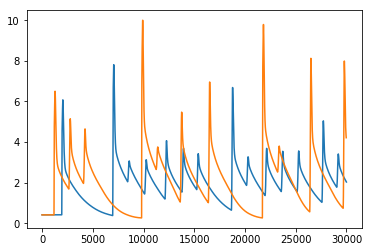

In [31]:
plt.plot(loop_noaa1158.time,loop_noaa1158.electron_temperature[:,0].to(u.MK))
plt.plot(loop_dipole.time,loop_dipole.electron_temperature[:,0].to(u.MK))

(0, 30)

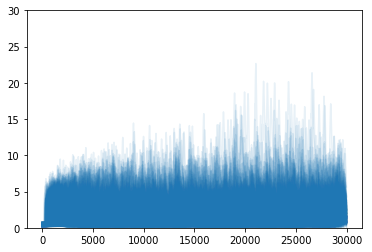

In [32]:
for l in noaa1158_low.loops[::5]:
    plt.plot(l.time,l.electron_temperature[:,0]/1e6,color='C0',alpha=0.1)
plt.ylim(0,30)

(0, 30)

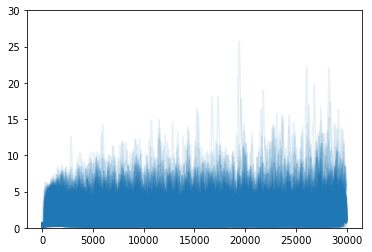

In [33]:
for l in dipole_low.loops[:]:
    plt.plot(l.time,l.electron_temperature[:,0]/1e6,color='C0',alpha=0.1)
plt.ylim(0,30)

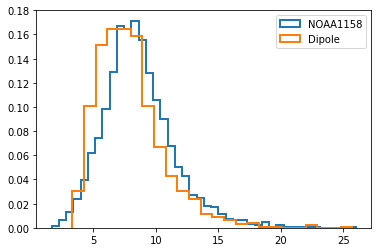

In [34]:
plt.hist([l.electron_temperature.value.max()/1e6 for l in noaa1158_low.loops],**opts,label='NOAA1158');
plt.hist([l.electron_temperature.value.max()/1e6 for l in dipole_low.loops],**opts,label='Dipole');
plt.legend()